In [2]:
from pymongo import MongoClient
import json
import os
from ITDclasses import DocumentoAcordao as DocAcordao
from ITDclasses import Voto, Relatorio
from ITDDBclasses import Database

DIR_BASE = '../baseITD/ITD/'
DATABASE = 'ITD'
COLLECTION_VOTOS = 'AcordaosVotos'
COLLECTION_RELATORIOS = 'AcordaosRelatorios'
COLLECTION_ACORDAOS = 'DocumentosAcordaos'

DB_ACORDAO = Database(diretorio=DIR_BASE, nomedb=DATABASE, colecao=COLLECTION_ACORDAOS)


In [3]:
acordaos = []
acordaos = [docacordao for docacordao in DB_ACORDAO.colecao.find({"$and":[{"relatorio": {"$ne": None}}, {'votos': {'$not': {'$size': 0}}}, {'partes': {'$not': {'$size': 0}}}] }, {"numero": 1, "ementa": 1, "acordao": 1, "partes": 1,"relatorio": 1, "votos": 1})]

print("Total de acórdãos: {0}".format(len(acordaos)))


Total de acórdãos: 41353


In [3]:
def get_acordao(acordaos, num, exibe=False):
    for acordao in acordaos:
        if acordao['numero'] == num:
            if exibe:
                print(str(acordao))
            return (acordao)
            
    return None    

#get_acordao(acordaos, '685997', exibe=True)

In [4]:
VOTANTES_OK = ['MINISTRO_PRESIDENTE', 'VICE_PRESIDENTE', 'MIN_GILMAR_MENDES', 'MIN_MARCO_AURELIO', 'MIN_RICARDO_LEWANDOWSKI', 
               'MIN_TEORI_ZAVASCKI', 'MIN_DIAS_TOFFOLI', 'MIN_CELSO_DE_MELLO', 'MINISTRO_PRESIDENTE', 
               'MIN_GILMAR_MENDES', 'MIN_EDSON_FACHIN', 'MIN_ROSA_WEBER', 'MIN_CARMEN_LUCIA', 'MIN_LUIZ_FUX',
               'MIN_ALEXANDRE_DE_MORAES', 'MIN_ROBERTO_BARROSO', 'MIN_JOAQUIM_BARBOSA', 'MIN_CEZAR_PELUSO',
               'MIN_ELLEN_GRACIE', 'MIN_AYRES_BRITTO', 'MIN_EROS_GRAU', 'MIN_CARLOS_VELLOSO', 'MIN_SEPULVEDA_PERTENCE',
               'MIN_MENEZES_DIREITO']
PARTES_OK = ['RELATOR', 'RELATORA', 'PACTE.(S)', 'IMPTE.(S)', 'COATOR(A/S)(ES)', 'RECTE.(S)', 'ADV.(A/S)', 'RECDO.(A/S)', 'PROC.(A/S)(ES)',
            'AGTE.(S)', 'AGDO.(A/S)', 'INVEST.(A/S)', 'REVISOR', 'RÉU(É)(S)', 'REVISORA', 'EMBTE.', 'ADVDA.', 'EMBDOS.', 'ADVDOS.',
            'SUSDO.(A/S)','REQDO.(A/S)','SUSTE.(S)', 'ADVDAS.', 'RECLTE.(S)', 'RECLDO.(A/S)', 'EMBDO.', 'AGTES.', 'AGDO.', 'AGTE.', 
            'EMBTES.', 'LIT.ATIV.(A/S)', 'APTE.(S)', 'APDO.(A/S)', 'BENEF.(A/S)', 'LITISC.(S)', 'ADV.DAT.(A/S)', 'INDIC.(A/S)', 
            'DNTE.(S)', 'DNDO.(A/S)', 'ADV.LIT.(A/S)', 'CURADOR(A/S)(ES)', 'IMPDO.(A/S)', 'INTDO.(A/S)', 'EMBTE.(S)',
            'REQTE.(S)', 'AUTOR(A/S)(ES)','EMBDO.(A/S)', 'AM.CURIAE.', 'LIT.PAS.(A/S)', 'EXTDO.(A/S)', 'REU(É)(S)',
            'ASSIST.(S)', 'ADV.', 'AGDOS.', 'RÉ', 'REGISTRADO', 'DP', 'QTE.(S)', 'EXTDO.', 'AGDA.', 'REDATORDOACÓRDÃO',
            'REDATORADOACÓRDÃO']

In [6]:
# Cria uma collection contendo somente os votos
DB_VOTOS = Database(diretorio=DIR_BASE, nomedb=DATABASE, colecao=COLLECTION_VOTOS)

for acordao in acordaos:
    if len(acordao['votos']) > 0:
        for voto in acordao['votos']:                        
            DB_VOTOS.insereVoto(Voto(votante=voto['votante'], texto=voto['texto']))



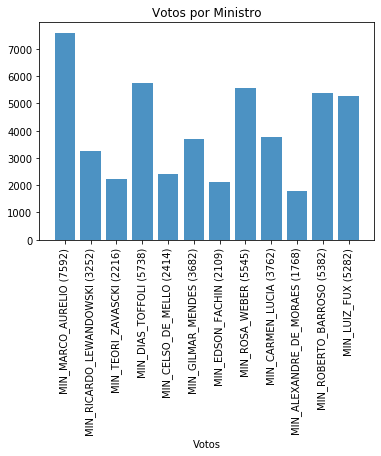

{'MIN_MARCO_AURELIO': 7592, 'MIN_RICARDO_LEWANDOWSKI': 3252, 'MIN_TEORI_ZAVASCKI': 2216, 'MIN_DIAS_TOFFOLI': 5738, 'MIN_CELSO_DE_MELLO': 2414, 'MIN_GILMAR_MENDES': 3682, 'MIN_EDSON_FACHIN': 2109, 'MIN_ROSA_WEBER': 5545, 'MIN_CARMEN_LUCIA': 3762, 'MIN_ALEXANDRE_DE_MORAES': 1768, 'MIN_ROBERTO_BARROSO': 5382, 'MIN_LUIZ_FUX': 5282}
Total de votos: 48742


In [210]:
MINISTROS_OK = ['MIN_GILMAR_MENDES', 'MIN_MARCO_AURELIO', 'MIN_RICARDO_LEWANDOWSKI', 
               'MIN_TEORI_ZAVASCKI', 'MIN_DIAS_TOFFOLI', 'MIN_CELSO_DE_MELLO', 
               'MIN_GILMAR_MENDES', 'MIN_EDSON_FACHIN', 'MIN_ROSA_WEBER', 'MIN_CARMEN_LUCIA', 'MIN_LUIZ_FUX',
               'MIN_ALEXANDRE_DE_MORAES', 'MIN_ROBERTO_BARROSO']

RELATORES_OK = [x.replace('.','').replace(' ','_') 
                for x in ['MIN. MARCO AURÉLIO', 'MIN. DIAS TOFFOLI', 'MIN. CELSO DE MELLO', 'MINISTRO PRESIDENTE', 
                          'MIN. GILMAR MENDES', 'MIN. EDSON FACHIN', 'MIN. ROSA WEBER', 'MIN. CÁRMEN LÚCIA', 
                          'MIN. ALEXANDRE DE MORAES', 'MIN. ROBERTO BARROSO', 'MIN. LUIZ FUX', 'MIN. RICARDO LEWANDOWSKI', 
                          'MIN. AYRES BRITTO', 'MIN. TEORI ZAVASCKI', 'MIN. JOAQUIM BARBOSA', 'MIN. CEZAR PELUSO', 
                          'MIN. ELLEN GRACIE', 'MIN. EROS GRAU', 'MIN. MENEZES DIREITO']]


In [3]:


# Cria uma collection contendo somente os votos
DB_RELATORIOS = Database(diretorio=DIR_BASE, nomedb=DATABASE, colecao=COLLECTION_RELATORIOS)

for acordao in acordaos:    
    if acordao['relatorio']:                 
        relator = acordao['relatorio']['relator'].replace('.','').replace(' ','_') 
        DB_RELATORIOS.insereRelatorio(Relatorio(relator=relator, texto=acordao['relatorio']['texto'] ))
            


In [4]:
COLLECTION_TESTE='AcordaosTeste'

# Cria uma collection contendo apenas 1000 acordaos para testes
DB_TESTE = Database(diretorio=DIR_BASE, nomedb=DATABASE, colecao=COLLECTION_TESTE)

for acordao in acordaos[:1000]:    
    if acordao:                         
        DB_TESTE.colecao.insert_one(acordao)
